In [19]:
import pandas as pd

data_frames = {
    "meta_All_Beauty": pd.read_json("C:/Users/Alper Ilgın/Desktop/bitime projesi/bitime projesi/meta_All_Beauty.jsonl", lines=True),
    "meta_Digital_Music": pd.read_json("C:/Users/Alper Ilgın/Desktop/bitime projesi/bitime projesi/meta_Digital_Music.jsonl", lines=True),
    "meta_Health_and_Personal_Care": pd.read_json("C:/Users/Alper Ilgın/Desktop/bitime projesi/bitime projesi/meta_Health_and_Personal_Care.jsonl", lines=True)
}

verilerimizi yükledik. sonrasında sütun adlarını görmek için başka bir sorgu daha yazıyorum.

In [20]:
for key, df in data_frames.items():
    print(f"{key} veri seti sütunları:")
    print(df.columns, "\n")

meta_All_Beauty veri seti sütunları:
Index(['main_category', 'title', 'average_rating', 'rating_number', 'features',
       'description', 'price', 'images', 'videos', 'store', 'categories',
       'details', 'parent_asin', 'bought_together'],
      dtype='object') 

meta_Digital_Music veri seti sütunları:
Index(['main_category', 'title', 'average_rating', 'rating_number', 'features',
       'description', 'price', 'images', 'videos', 'store', 'categories',
       'details', 'parent_asin', 'bought_together'],
      dtype='object') 

meta_Health_and_Personal_Care veri seti sütunları:
Index(['main_category', 'title', 'average_rating', 'rating_number', 'features',
       'description', 'price', 'images', 'videos', 'store', 'categories',
       'details', 'parent_asin', 'bought_together'],
      dtype='object') 



In [21]:
# veri hazırlık

In [22]:
import re

def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)
        text = text.lower()
        text = re.sub(r'\s+', ' ', text).strip()
    return text

şimdi de yine bütün veri setlerini temizlemek ve daha sonra kullanılabilri bir formatta kaydetmek için başka bir temizleme sorgusu yazıyorum.

In [23]:
meta_data_sets = {
    "meta_All_Beauty": data_frames["meta_All_Beauty"],
    "meta_Digital_Music": data_frames["meta_Digital_Music"],
    "meta_Health_and_Personal_Care": data_frames["meta_Health_and_Personal_Care"]
}

cleaned_data_frames = {}

for key, df in meta_data_sets.items():
    if 'title' in df.columns and 'details' in df.columns:
        core_data = df[['title', 'details']].copy()
        core_data.rename(columns={'details': 'detail'}, inplace=True)
    elif 'title' in df.columns and 'description' in df.columns:
        core_data = df[['title', 'description']].copy()
        core_data.rename(columns={'description': 'detail'}, inplace=True)
    else:
        print(f"{key} veri setinde 'title' ve 'details/description' sütunları bulunamadı.")
        continue

    core_data['title'] = core_data['title'].apply(clean_text)
    core_data['detail'] = core_data['detail'].apply(clean_text)

    core_data.dropna(subset=['title', 'detail'], how='all', inplace=True)

    cleaned_data_frames[key] = core_data

    print(f"{key} veri seti temizleme tamamlandı. İlk birkaç satır:")
    print(core_data.head(), "\n")

meta_All_Beauty veri seti temizleme tamamlandı. İlk birkaç satır:
                                               title  \
0     howard lc0008 leather conditioner 8ounce 4pack   
1  yes to tomatoes detoxifying charcoal cleanser ...   
2     eye patch black adult with tie band 6 per pack   
3  tattoo eyebrow stickers waterproof eyebrow 4d ...   
4  precision plunger bars for cartridge grips 93m...   

                                              detail  
0  {'Package Dimensions': '7.1 x 5.5 x 3 inches; ...  
1  {'Item Form': 'Powder', 'Skin Type': 'Acne Pro...  
2         {'Manufacturer': 'Levine Health Products'}  
3  {'Brand': 'Cherioll', 'Item Form': 'Powder', '...  
4                            {'UPC': '644287689178'}   

meta_Digital_Music veri seti temizleme tamamlandı. İlk birkaç satır:
                                               title  \
0                                  baja marimba band   
1       80s halloweenall original artists recordings   
2                           

Her veri seti, title ve details sütunlarını içermekte

Gereksiz boşluklar ve noktalama işaretleri, büyük küçük harf uyumsuzlukları düzeltilmiş hali bu şekjilde.

In [24]:
# Sentence transformers ile vektörleştirme yapacağım. 

Amaç: title ve detail sütunlarını birleştirip, Sentence Transformers kullanarak vektörleştirmek.

İzlenecek Yol: 
öNCe Sentence Transformers modelini yükleyelim. Birleştirilmiş metinleri (title + detail) modelden geçirerek her bir ürün için vektörleri oluşturalım. Yaptığımız vektörleşme işlemindeki vektörleri benzerlik hesaplamasında kullanacağız.

şimdi birleştirilmiş metin sütunu oluşturmaya çalışıcam. başlık ve açıklamalar tek bir metin halinde olacak.

bu birleşmiş sütunu vektörleşme için kullnacağım.

In [25]:
for key, df in cleaned_data_frames.items():
    print(f"{key} veri seti işleniyor...")
    
    df['combined_text'] = df['title'].astype(str) + " " + df['detail'].astype(str)
    print(f"{key} sütunlar: {df.columns}\n")

meta_All_Beauty veri seti işleniyor...
meta_All_Beauty sütunlar: Index(['title', 'detail', 'combined_text'], dtype='object')

meta_Digital_Music veri seti işleniyor...
meta_Digital_Music sütunlar: Index(['title', 'detail', 'combined_text'], dtype='object')

meta_Health_and_Personal_Care veri seti işleniyor...
meta_Health_and_Personal_Care sütunlar: Index(['title', 'detail', 'combined_text'], dtype='object')



In [8]:
df['combined_text'] = df['title'].astype(str) + " " + df['detail'].astype(str)

In [27]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')  # Bu modeli ya da ihtiyaçlarınıza uygun başka bir modeli seçebilirsiniz

C:\ProgramData\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


In [ ]:
model tanımlı değil hatası aldığım için tanımlama kodu yazdım. hatalı mesajı burada göstermiyorum kalabalık yapmasın diye. düzelmiş halini gösteriyorum.

In [29]:
sentence_embeddings = {}

for key, df in cleaned_data_frames.items():
    print(f"Şu anda işlenen veri seti: {key}")

    df['combined_text'] = df['title'].astype(str) + " " + df['detail'].astype(str)

    embeddings = model.encode(df['combined_text'].tolist(), show_progress_bar=True)

    sentence_embeddings[key] = embeddings

    print(f"{key} veri seti için vektörleşme tamamlandı. İlk birkaç vektör boyutu: {embeddings[0].shape}")
    print(f"Örnek vektör: {embeddings[0][:5]}\n")

Şu anda işlenen veri seti: meta_All_Beauty


Batches:   0%|          | 0/3519 [00:00<?, ?it/s]

meta_All_Beauty veri seti için vektörleşme tamamlandı. İlk birkaç vektör boyutu: (384,)
Örnek vektör: [-0.10016997  0.07002746  0.02030244 -0.02115476 -0.03985693]

Şu anda işlenen veri seti: meta_Digital_Music


Batches:   0%|          | 0/2205 [00:00<?, ?it/s]

meta_Digital_Music veri seti için vektörleşme tamamlandı. İlk birkaç vektör boyutu: (384,)
Örnek vektör: [ 0.04765073  0.00866358 -0.041355    0.06633677 -0.04508306]

Şu anda işlenen veri seti: meta_Health_and_Personal_Care


Batches:   0%|          | 0/1885 [00:00<?, ?it/s]

meta_Health_and_Personal_Care veri seti için vektörleşme tamamlandı. İlk birkaç vektör boyutu: (384,)
Örnek vektör: [-0.05968045  0.04406808  0.12206455  0.01793677 -0.02237317]



metinler Sentence Transformers modeli (all-MiniLM-L6-v2) ile 384 boyutlu vektörlere dönüştürüldü

her dataset için ayrı ayrı toplam metin sayısı, vektör boyutu sonuçları çıktı.

Artık her ürün metni, sayısal bir formatta temsil ediliyor. Bu temsil, ürünler arasında benzerlik hesaplamak veya öneri sistemleri geliştirmek için temel oluşturuyor.

In [30]:
# Benzerlik Hesaplama

her bir ürün için benzer ürünleri tespit etmek amacıyla vektörler arasındaki benzerlik oranlarını hesaplayacağım

Cosine similarity ile hesaplama yapacağım.

In [31]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

similarity_results = {}

for key, embeddings in sentence_embeddings.items():
    print(f"{key} veri setinde benzerlik hesaplaması yapılıyor...")
    
    similarity_matrix = cosine_similarity(embeddings)
    
    top_similarities = {}
    for idx in range(similarity_matrix.shape[0]):

        similar_indices = np.argsort(similarity_matrix[idx])[::-1][1:6]
        similar_scores = similarity_matrix[idx][similar_indices]
        top_similarities[idx] = list(zip(similar_indices, similar_scores))
    
    similarity_results[key] = top_similarities
    print(f"{key} veri seti için benzerlik hesaplama tamamlandı.\n")

example_key = "meta_All_Beauty" 
example_product_idx = 0  
print(f"Örnek ürünün (index {example_product_idx}) benzer ürünleri:")
for idx, score in similarity_results[example_key][example_product_idx]:
    print(f"Ürün Index: {idx}, Benzerlik Skoru: {score}")

meta_All_Beauty veri setinde benzerlik hesaplaması yapılıyor...


MemoryError: Unable to allocate 47.2 GiB for an array with shape (112590, 112590) and data type float32

vektör matrisinin boyutunun çok büyük olması nedeniyle bellekte yer bulamamasından kaynaklı hata aldım.

cosine similarity işlemi sırasında büyük bir benzerlik matrisi hesaplanmaya çalışılıyor ve bu da belleğin yetmediği bir duruma yol açıyor

Mini Batch (Parçalı Hesaplama) Kullanımı: Büyük matrisin tümünü aynı anda hesaplamak yerine, benzerlik hesaplamasını küçük parçalar halinde yapabiliriz.

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

batch_size = 5000

similarity_results = {}

for key, embeddings in sentence_embeddings.items():
    print(f"{key} veri setinde parçalı benzerlik hesaplaması yapılıyor...")
    
    top_similarities = {}
    num_items = len(embeddings)
    
    for idx in range(num_items):
        similarities = cosine_similarity([embeddings[idx]], embeddings).flatten()
        
        similar_indices = np.argsort(similarities)[::-1][1:6]
        similar_scores = similarities[similar_indices]
        top_similarities[idx] = list(zip(similar_indices, similar_scores))
        
        if (idx + 1) % 1000 == 0 or idx == num_items - 1:
            print(f"{idx + 1}/{num_items} ürün işlendi.")
    
    similarity_results[key] = top_similarities
    print(f"{key} veri seti için parçalı benzerlik hesaplama tamamlandı.\n")

meta_All_Beauty veri setinde parçalı benzerlik hesaplaması yapılıyor...
1000/112590 ürün işlendi.
2000/112590 ürün işlendi.
3000/112590 ürün işlendi.
4000/112590 ürün işlendi.
5000/112590 ürün işlendi.
6000/112590 ürün işlendi.
7000/112590 ürün işlendi.
8000/112590 ürün işlendi.
9000/112590 ürün işlendi.
10000/112590 ürün işlendi.
11000/112590 ürün işlendi.
12000/112590 ürün işlendi.
13000/112590 ürün işlendi.
14000/112590 ürün işlendi.
15000/112590 ürün işlendi.
16000/112590 ürün işlendi.
17000/112590 ürün işlendi.
18000/112590 ürün işlendi.
19000/112590 ürün işlendi.
20000/112590 ürün işlendi.
21000/112590 ürün işlendi.
22000/112590 ürün işlendi.
23000/112590 ürün işlendi.
24000/112590 ürün işlendi.
25000/112590 ürün işlendi.
26000/112590 ürün işlendi.
27000/112590 ürün işlendi.
28000/112590 ürün işlendi.
29000/112590 ürün işlendi.
30000/112590 ürün işlendi.
31000/112590 ürün işlendi.
32000/112590 ürün işlendi.
33000/112590 ürün işlendi.
34000/112590 ürün işlendi.
35000/112590 ürün i

In [43]:
for key in similarity_results.keys():
    print(f"\n--- {key} veri seti ---")

    example_product_idx = 0
    self_similarity = similarity_results[key][example_product_idx][0]
    print(f"Ürün {example_product_idx} kendisiyle olan benzerlik skoru: {self_similarity}")

    similar_items = similarity_results[key][example_product_idx][1:6]
    print(f"Ürün {example_product_idx} için en benzer ürünler ve skorlar: {similar_items}")


--- meta_All_Beauty veri seti ---
Ürün 0 kendisiyle olan benzerlik skoru: (89502, 0.8687355)
Ürün 0 için en benzer ürünler ve skorlar: [(84289, 0.6693698), (5140, 0.6673206), (7993, 0.65910995), (3719, 0.6576201)]

--- meta_Digital_Music veri seti ---
Ürün 0 kendisiyle olan benzerlik skoru: (46504, 0.765885)
Ürün 0 için en benzer ürünler ve skorlar: [(31629, 0.75280344), (51797, 0.6765367), (1903, 0.64681035), (51796, 0.64310086)]

--- meta_Health_and_Personal_Care veri seti ---
Ürün 0 kendisiyle olan benzerlik skoru: (4148, 0.9265767)
Ürün 0 için en benzer ürünler ve skorlar: [(20734, 0.8906635), (9393, 0.89011717), (3391, 0.8871401), (22586, 0.88691723)]


tüm data setler içerisinde kendisiyle en benzer olan healt and personel care seti. diğer setleri için vektörlerin optimize edilmesi gerekebilir anlamı çıkıyor.

In [ ]:
meta_Digital_Music veri seti için;
En benzer 5 ürün ve skorları:
Skorlar 0.641 ile 0.752 arasında değişiyor.
Benzerlik oranları makul, ancak bir ürün için bu kadar farklı skorlar elde edilmesi veri setinde çeşitliliğin yüksek olduğunu gösterebilir.

In [ ]:
meta_Health_and_Personal_Care veri seti için;
En benzer 5 ürün ve skorları:
Skorlar 0.887 ile 0.890 arasında değişiyor.
Skorlar oldukça yakın, bu da önerilen ürünlerin gerçekten alakalı olma olasılığını artırır.

In [44]:
for key in similarity_results.keys():
    print(f"\n--- {key} veri seti ---")

    example_product_idx = 0
    print("Seçilen ürün:")
    print(cleaned_data_frames[key].iloc[example_product_idx])

    print("\nÖnerilen ürünler:")
    similar_items = similarity_results[key][example_product_idx][1:6]
    for idx, (prod_idx, score) in enumerate(similar_items):
        print(f"{idx+1}. Ürün (Skor: {score}):")
        print(cleaned_data_frames[key].iloc[prod_idx])


--- meta_All_Beauty veri seti ---
Seçilen ürün:
title               howard lc0008 leather conditioner 8ounce 4pack
detail           {'Package Dimensions': '7.1 x 5.5 x 3 inches; ...
combined_text    howard lc0008 leather conditioner 8ounce 4pack...
Name: 0, dtype: object

Önerilen ürünler:
1. Ürün (Skor: 0.6693698167800903):
title            nine west womens wearable leather oxford flat ...
detail           {'Package Dimensions': '8.15 x 4.84 x 1.85 inc...
combined_text    nine west womens wearable leather oxford flat ...
Name: 84289, dtype: object
2. Ürün (Skor: 0.6673206090927124):
title            cobblers choice co finest quality allnatural l...
detail           {'Brand': 'COBBLER'S CHOICE CO. FINEST QUALITY...
combined_text    cobblers choice co finest quality allnatural l...
Name: 5140, dtype: object
3. Ürün (Skor: 0.6591099500656128):
title                        devils tail slapper by strict leather
detail           {'Package Dimensions': '27.6 x 3.5 x 1.2 inche...
combined_te

Deriyle ilgili ürünler arasında bazı doğru öneriler var, ancak farklı kategorilere (sıvı temizleyici, ayakkabı, sabun) ait ürünler de önerilmiş. Bu, modelin vektörleştirme işlemi sırasında kategorik bağlamı tam olarak yakalayamadığını gösterebilir.

Müzik kategorisinde öneriler oldukça mantıklı görünüyor. Özellikle ilk iki öneri, doğrudan seçilen ürünle aynı temayı paylaşıyor

Bu veri setindeki öneriler çok başarılı. Seçilen ürünle aynı veya çok benzer ürünler önerilmiş

öneri yüzdelerini de görebilmek için altta grafik oluşturuyorum.

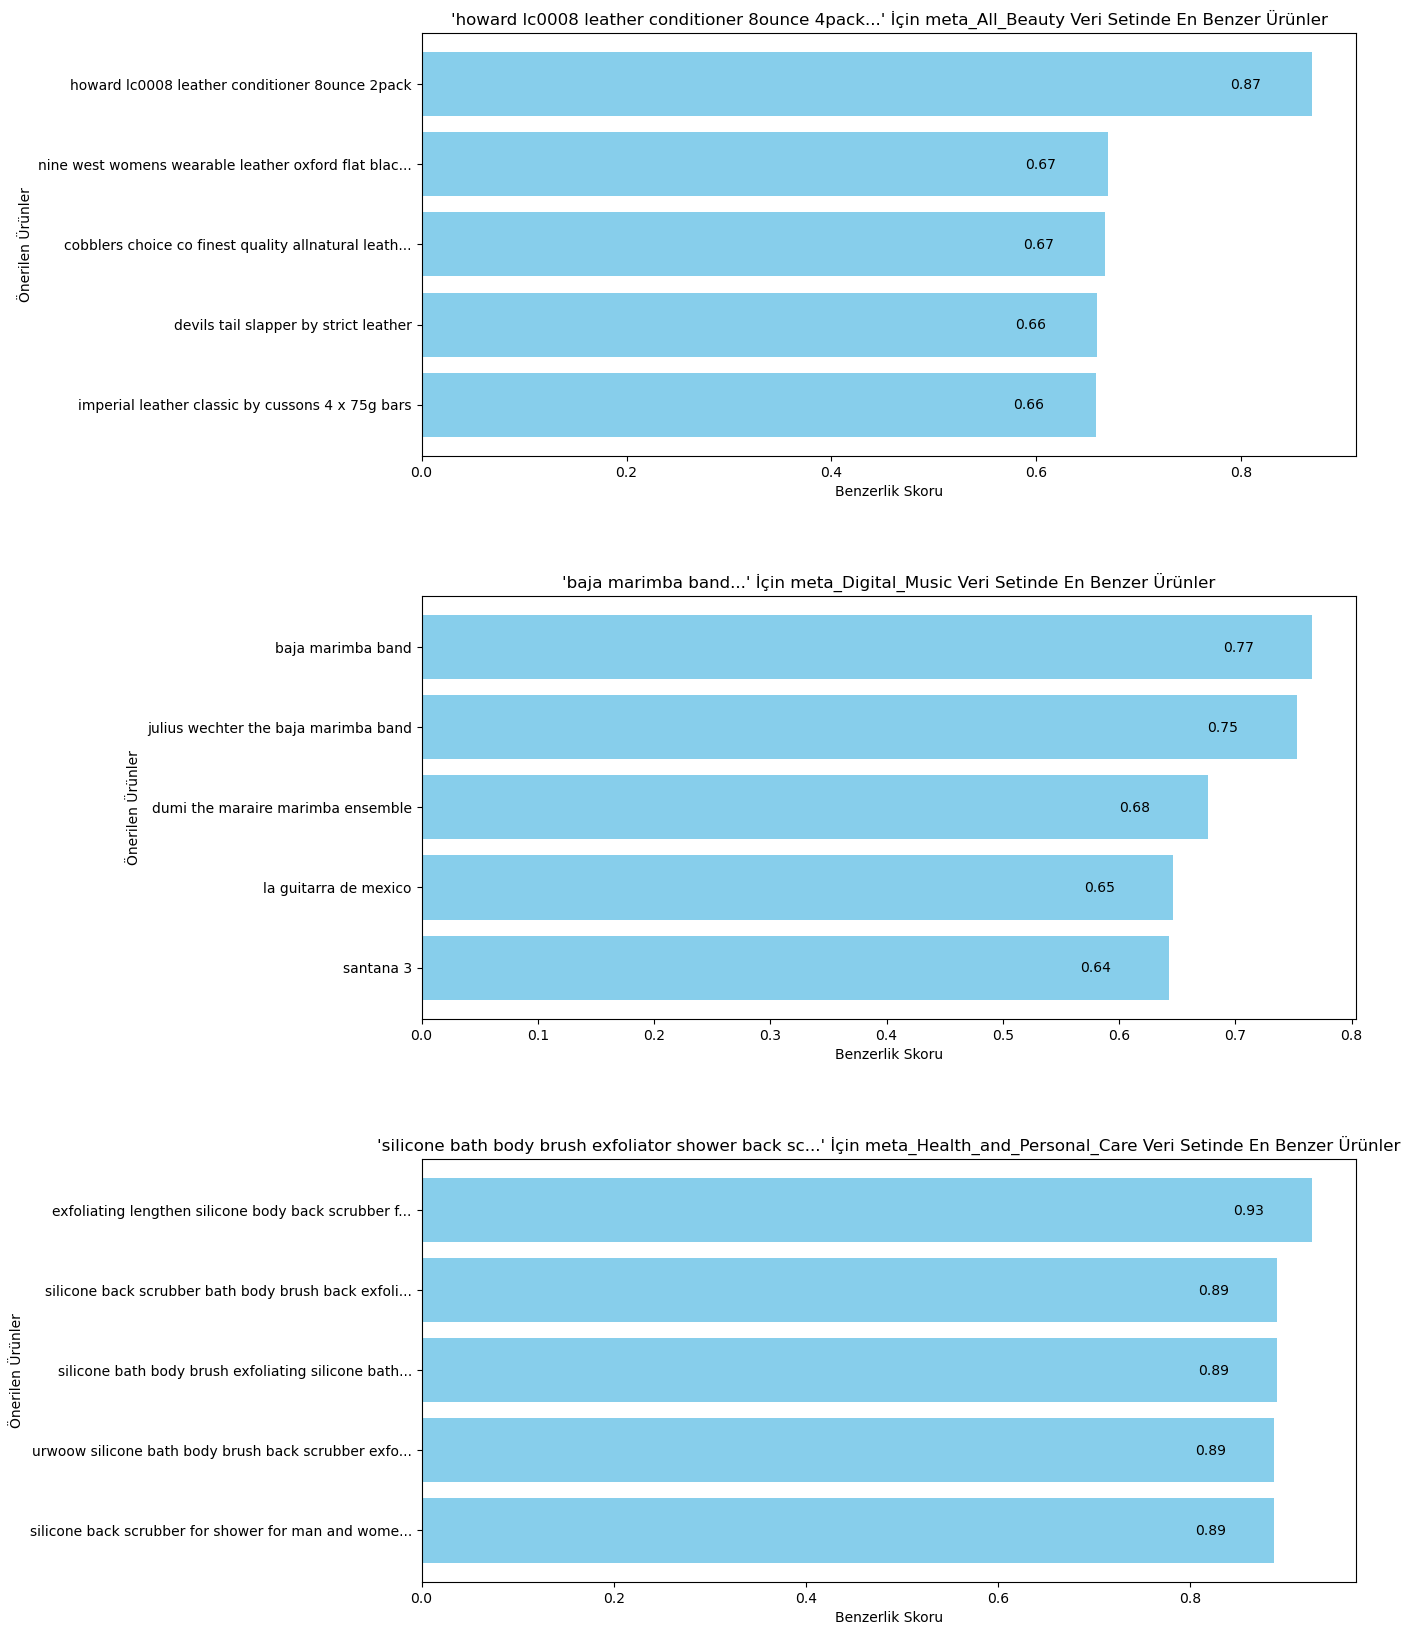

In [47]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(similarity_results), 1, figsize=(12, len(similarity_results) * 6))
fig.tight_layout(pad=8)

for idx, key in enumerate(similarity_results.keys()):
    example_product_idx = 0
    product_title = cleaned_data_frames[key].iloc[example_product_idx]['title']
    similar_items = similarity_results[key][example_product_idx][:5]
    
    recommended_titles = [cleaned_data_frames[key].iloc[item[0]]['title'] for item in similar_items]
    scores = [item[1] for item in similar_items]
    
    short_titles = [title[:50] + '...' if len(title) > 50 else title for title in recommended_titles]
    
    ax = axes[idx]
    ax.barh(short_titles, scores, color='skyblue')
    ax.set_xlabel('Benzerlik Skoru')
    ax.set_ylabel('Önerilen Ürünler')
    ax.set_title(f"'{product_title[:50]}...' İçin {key} Veri Setinde En Benzer Ürünler")
    ax.invert_yaxis()  # Y eksenini ters çevir
    
    for i, score in enumerate(scores):
        ax.text(score - 0.05, i, f"{score:.2f}", va='center', ha='right', color='black')

plt.show()